In [94]:
import numpy as np # Need numpy 1.14!!!
import matplotlib.pyplot as plt
import scipy.signal as signal


from google.colab import drive
drive.mount('/content/drive', force_remount=True)
subject_6_data = np.load('drive/My Drive/Colab/subject_06.npz', 'rb', allow_pickle=True)
subject_8_data = np.load('drive/My Drive/Colab/subject_08.npz','rb', allow_pickle=True)
subject_12_data = np.load('drive/My Drive/Colab/subject_12.npz','rb', allow_pickle=True)


Mounted at /content/drive


In [181]:
eeg_data = subject_6_data['eeg_data']
fs = int(subject_6_data['fs']) # Sampling rate of EEG (512 Hz)
eyes_closed_indices = subject_6_data['eyes_closed_indices']
eyes_opened_indices = subject_6_data['eyes_opened_indices']
channel_labels = subject_6_data['channel_labels']

t_eeg = np.arange(eeg_data.shape[0])/fs

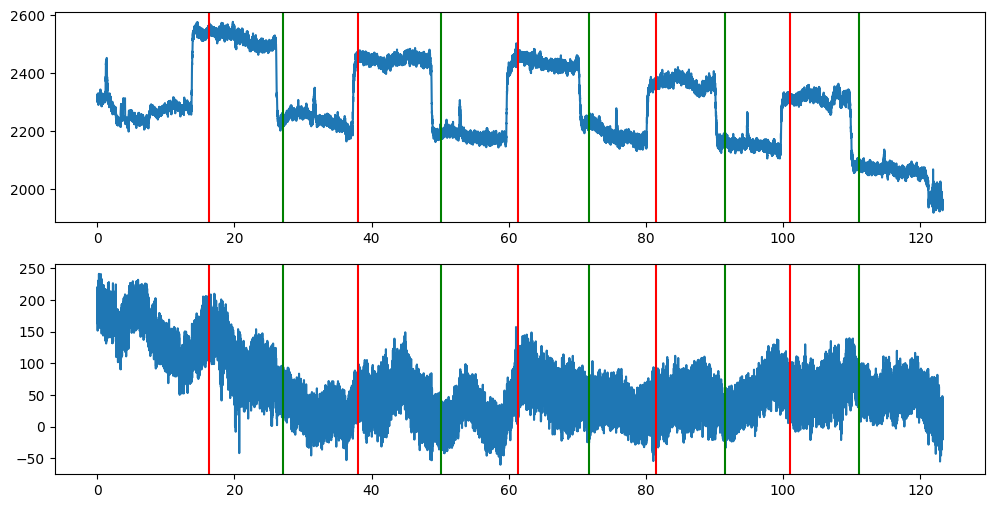

In [182]:
fig, ax = plt.subplots(2,1, figsize=(12,6))

t = np.arange(eeg_data.shape[0])/fs # Time axis data starts at time 0 and goes to the end with 1/sampling-rate time steps

ax[0].plot(t, eeg_data[:,0]) # Plot channel 0 (Fp1)
ax[1].plot(t, eeg_data[:,13]) # Plot channel 13 (O1)

# Plot the moments when the eyes closed and the eyes opened according to the experimenter
for a in ax:
    for closed in eyes_closed_indices:
        a.axvline(t[closed], color='r')
    for opened in eyes_opened_indices:
        a.axvline(t[opened], color='g')

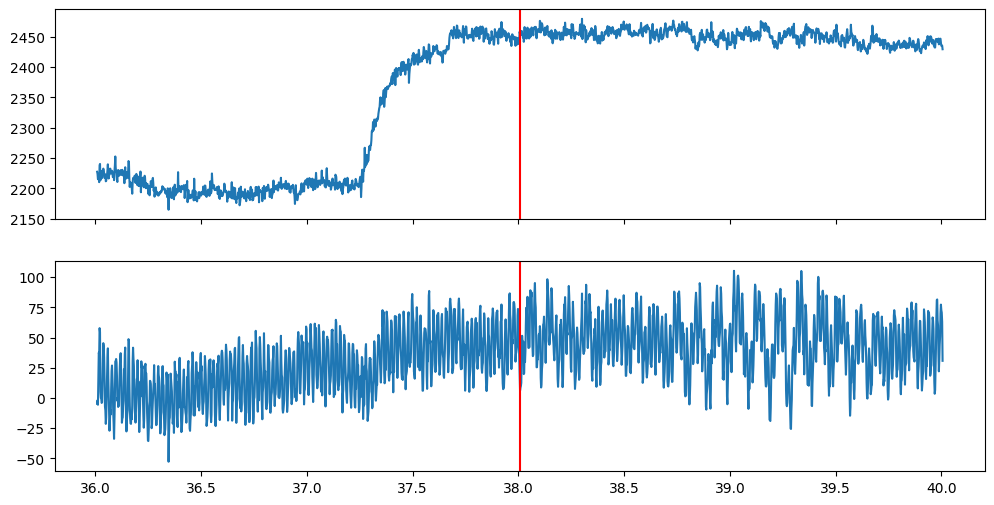

In [183]:
closed_index = eyes_closed_indices[1,0] # Index of second eyes closing index

fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)

ax[0].plot(t[closed_index - 1024: closed_index + 1024], eeg_data[closed_index - 1024: closed_index + 1024, 0])
ax[1].plot(t[closed_index - 1024: closed_index + 1024], eeg_data[closed_index - 1024: closed_index + 1024, 13])
ax[0].axvline(t[closed_index], color='r')
ax[1].axvline(t[closed_index], color='r')

In [184]:
eyes_closed_signals = []
eyes_opened_signals = []
window_indices = np.arange(4*fs) + 4*fs # Indices will be a vector of 4 s of samples start 4 s after index

for closed in eyes_closed_indices:
    eyes_closed_signals.append(eeg_data[closed + window_indices,:])

for opened in eyes_opened_indices:
    eyes_opened_signals.append(eeg_data[opened + window_indices,:])

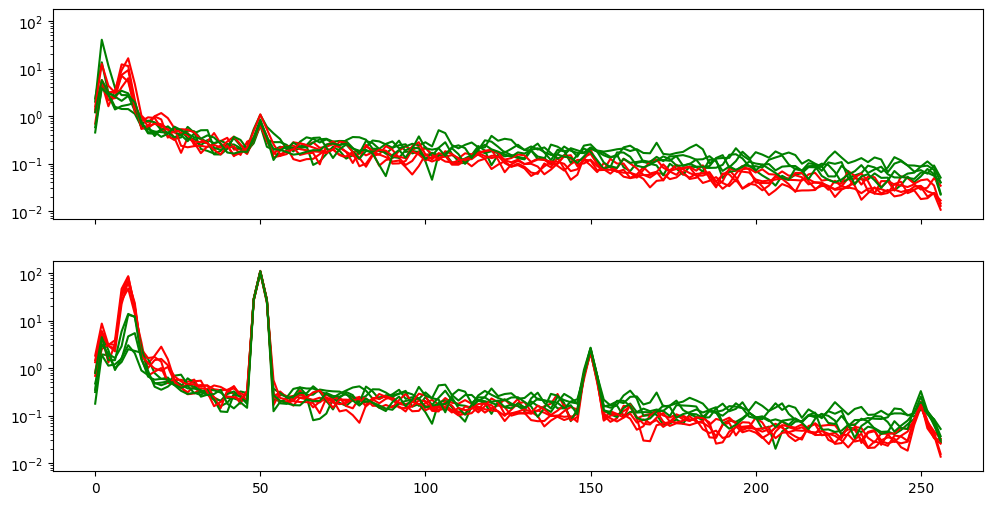

In [185]:
fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True, sharey=True)

for i in range(5):
    # Calculate and plot the PSDs for channel 0
    f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=256)
    ax[0].semilogy(f,Pxx, 'r')
    f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=256)
    ax[0].semilogy(f,Pxx, 'g')

    # Calculate and plot the PSDs for channel 0
    f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=256)
    ax[1].semilogy(f,Pxx, 'r')
    f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=256)
    ax[1].semilogy(f,Pxx, 'g')

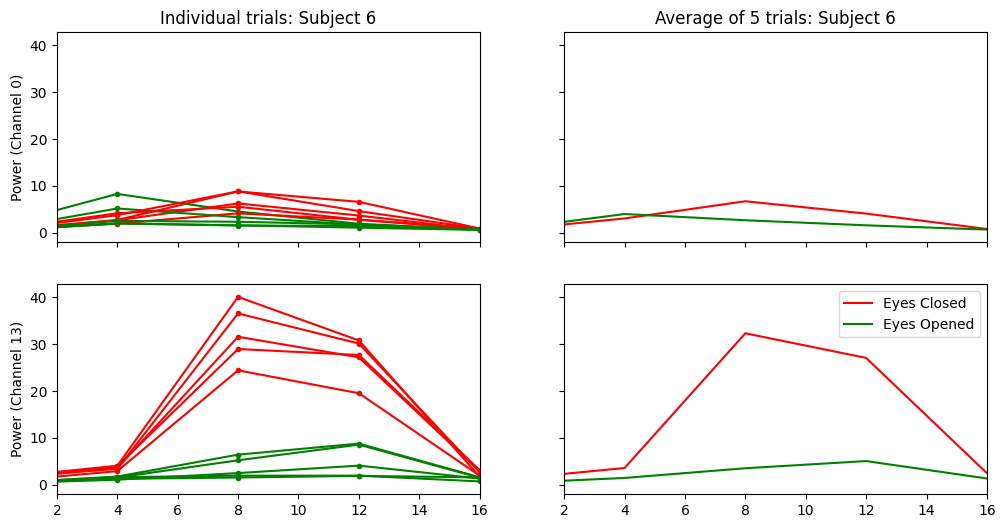

In [186]:
# Problem 1A #
fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)

nperseg = 128

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'r.-')
    eyes_closed_Pxx.append(Pxx)
    f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'g.-')
    eyes_opened_Pxx.append(Pxx)

ax[0,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r')
ax[0,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g')

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=nperseg)
    eyes_closed_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'r.-')

    f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=nperseg)
    eyes_opened_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'g.-')

ax[1,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r', label='Eyes Closed')
ax[1,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g', label='Eyes Opened')

ax[0,0].set_title('Individual trials: Subject 6')
ax[0,1].set_title('Average of 5 trials: Subject 6')
ax[0,0].set_ylabel('Power (Channel 0)')
ax[1,0].set_ylabel('Power (Channel 13)')
ax[0,0].set_xlim(2,16)
ax[1,1].legend()


Problem 1A: For the smallest value of nperseg in cahannel thirteen we can see the alpha band is present when the eyes closed at around 8-12 hurts with higher variability given the lower nperseg value.

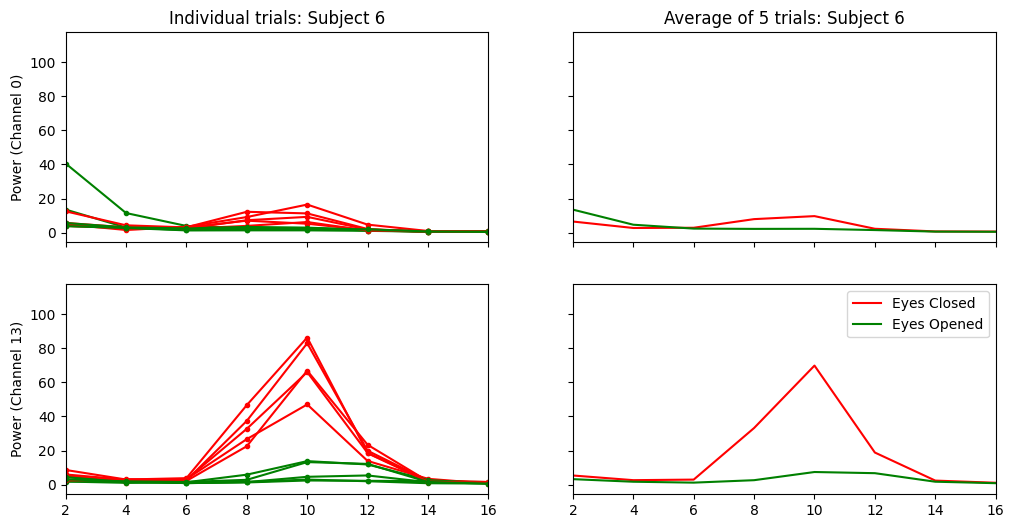

In [187]:
# Problem 1A #
fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)

nperseg = 256

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'r.-')
    eyes_closed_Pxx.append(Pxx)
    f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'g.-')
    eyes_opened_Pxx.append(Pxx)

ax[0,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r')
ax[0,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g')

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=nperseg)
    eyes_closed_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'r.-')

    f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=nperseg)
    eyes_opened_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'g.-')

ax[1,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r', label='Eyes Closed')
ax[1,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g', label='Eyes Opened')

ax[0,0].set_title('Individual trials: Subject 6')
ax[0,1].set_title('Average of 5 trials: Subject 6')
ax[0,0].set_ylabel('Power (Channel 0)')
ax[1,0].set_ylabel('Power (Channel 13)')
ax[0,0].set_xlim(2,16)
ax[1,1].legend()

Preoblem 1A: For the nperseg value of 256 we start to see the alpha channel 13 peaking at 10 hz giving us the alpha freqeuncy for this subject when their eyes are closed. The peak is still a little noisy but is distinctly at 10 hz.

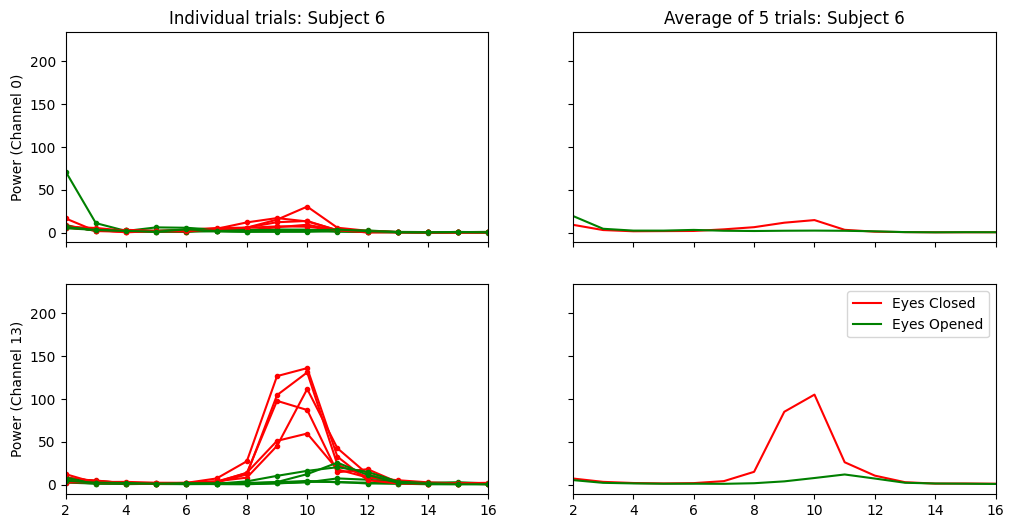

In [188]:
# Problem 1A #
fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)

nperseg = 512

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'r.-')
    eyes_closed_Pxx.append(Pxx)
    f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'g.-')
    eyes_opened_Pxx.append(Pxx)

ax[0,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r')
ax[0,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g')

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=nperseg)
    eyes_closed_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'r.-')

    f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=nperseg)
    eyes_opened_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'g.-')

ax[1,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r', label='Eyes Closed')
ax[1,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g', label='Eyes Opened')

ax[0,0].set_title('Individual trials: Subject 6')
ax[0,1].set_title('Average of 5 trials: Subject 6')
ax[0,0].set_ylabel('Power (Channel 0)')
ax[1,0].set_ylabel('Power (Channel 13)')
ax[0,0].set_xlim(2,16)
ax[1,1].legend()

Problem 1A: For nperseg of 512 double wha the last one. The data starts to smooth out with a larger value and has a distinct peak at 10 hz in channel 13. The figure is still a little noisy but the alpha peak can be seen for eyes closed.

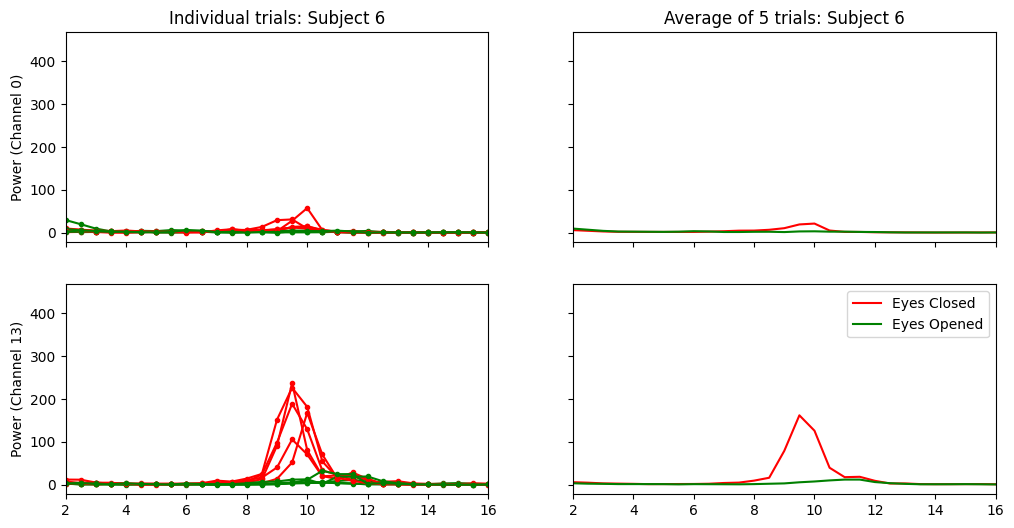

In [189]:
# Problem 1A #
fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)

nperseg = 1024

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'r.-')
    eyes_closed_Pxx.append(Pxx)
    f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'g.-')
    eyes_opened_Pxx.append(Pxx)

ax[0,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r')
ax[0,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g')

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=nperseg)
    eyes_closed_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'r.-')

    f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=nperseg)
    eyes_opened_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'g.-')

ax[1,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r', label='Eyes Closed')
ax[1,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g', label='Eyes Opened')

ax[0,0].set_title('Individual trials: Subject 6')
ax[0,1].set_title('Average of 5 trials: Subject 6')
ax[0,0].set_ylabel('Power (Channel 0)')
ax[1,0].set_ylabel('Power (Channel 13)')
ax[0,0].set_xlim(2,16)
ax[1,1].legend()

Problem 1A: For the largest nperseg value of 1024 we can see a distinction in peaks as the eyes are closed more so than the previous nperseg values. Here we have a peak that is smoothing out and less nooisy than the previous peaks.

1A: The alpha rhythm for subject 6 is observed consistently over the various nperseg values at the 10hz frequency. The varying nperseg values does not change the location of the peak a significant amount all peaks stay in the 8-12 alpha range but the larger values provide a smoother estimate with less noise. The larger nperseg values also changes the size of the power on the y-axis of the charts. The frequency resolution increases as the value of nperseg increases. The nperseg that gets the job done to find the peak for the channels is 256 where a clear peak can be seen at the relative frequecy.

In [190]:
# Problem 1B #
def extract_alpha_power(eeg_channel=0, frequency=10, nperseg=256, window_size=4.0, window_offset=4.0):
    eyes_closed_signals = []
    eyes_opened_signals = []
    window_indices = np.arange(int(window_size*fs)) + int(window_offset*fs) # this is the index into the data for the time windows

    for closed in eyes_closed_indices:
        eyes_closed_signals.append(eeg_data[closed + window_indices,:])

    for opened in eyes_opened_indices:
        eyes_opened_signals.append(eeg_data[opened + window_indices,:])

    f, eyes_closed_Pxx = signal.welch(eyes_closed_signals, fs, axis=1, nperseg=nperseg) # axis 0 is trials, axis 1 is time, axis 2 is channel
    f, eyes_opened_Pxx = signal.welch(eyes_opened_signals, fs, axis=1, nperseg=nperseg)

    fidx = np.abs(f - frequency).argmin()
    print('Using frequency {} ({} specified).'.format(f[fidx], frequency))

    return np.mean(eyes_closed_Pxx[:,fidx,eeg_channel], axis=0), np.mean(eyes_opened_Pxx[:,fidx,eeg_channel], axis=0)



Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).


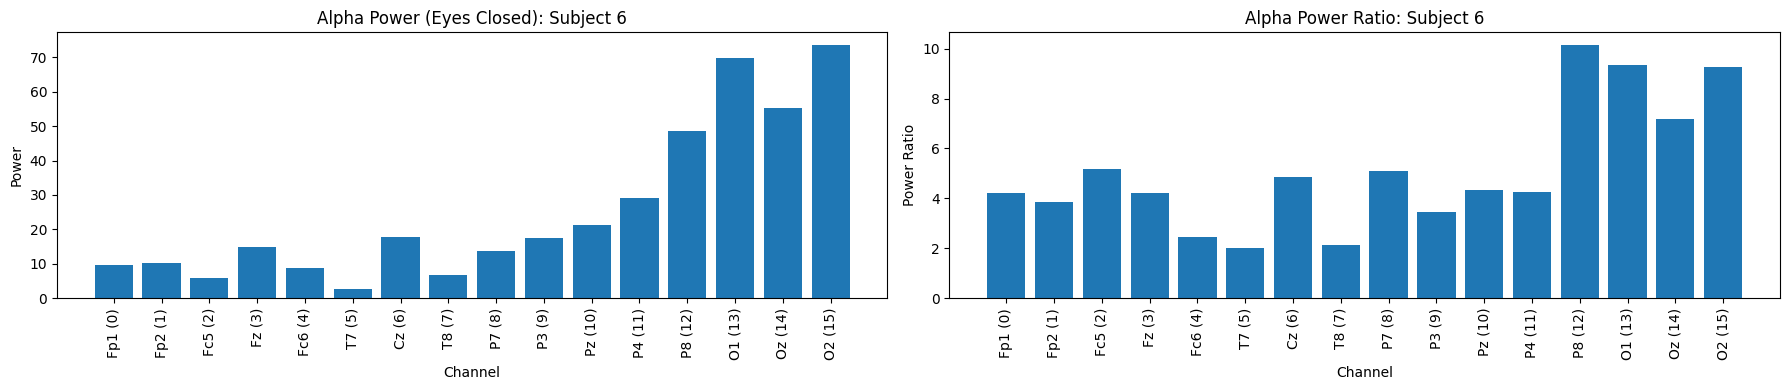

In [191]:
# Problem 1B #
alpha_power = []
alpha_power_ratio = []
for ch in range(16):
    ####
    # Fill in function call, ratio calculation and list appends (i.e., alpha_power.append(value1)) here...
     eyes_closed_power, eyes_opened_power = extract_alpha_power(eeg_channel=ch, nperseg=256, frequency = 10)

     alpha_power.append(eyes_closed_power)

     if eyes_opened_power > 0:  # Avoid division by zero
        alpha_power_ratio.append(eyes_closed_power / eyes_opened_power)
     else:
        alpha_power_ratio.append(float('inf'))

fig, ax = plt.subplots(1,2, figsize=(18,4))
plot_labels = ['{} ({})'.format(ind, lab) for lab, ind in enumerate(channel_labels)]
ax[0].bar(plot_labels, alpha_power)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title('Alpha Power (Eyes Closed): Subject 6')
ax[0].set_xlabel('Channel')
ax[0].set_ylabel('Power')

ax[1].bar(plot_labels, alpha_power_ratio)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('Alpha Power Ratio: Subject 6')
ax[1].set_xlabel('Channel')
ax[1].set_ylabel('Power Ratio')

plt.tight_layout()
plt.show()

1B: Based on our best frequecy that we found earlier in problem 1A we can use the extract_alpha_power using the frequency = 10. When looking at frequecy = 10 the largest channel for when subject 6's eyes are close is channel 15 (O2). When looking at the ratio of eyes-closed to eye-opens, we can see that channel 12 (P8) has the largest difference between eyes opened and eyes closed because of the larger ratio being obeserved.

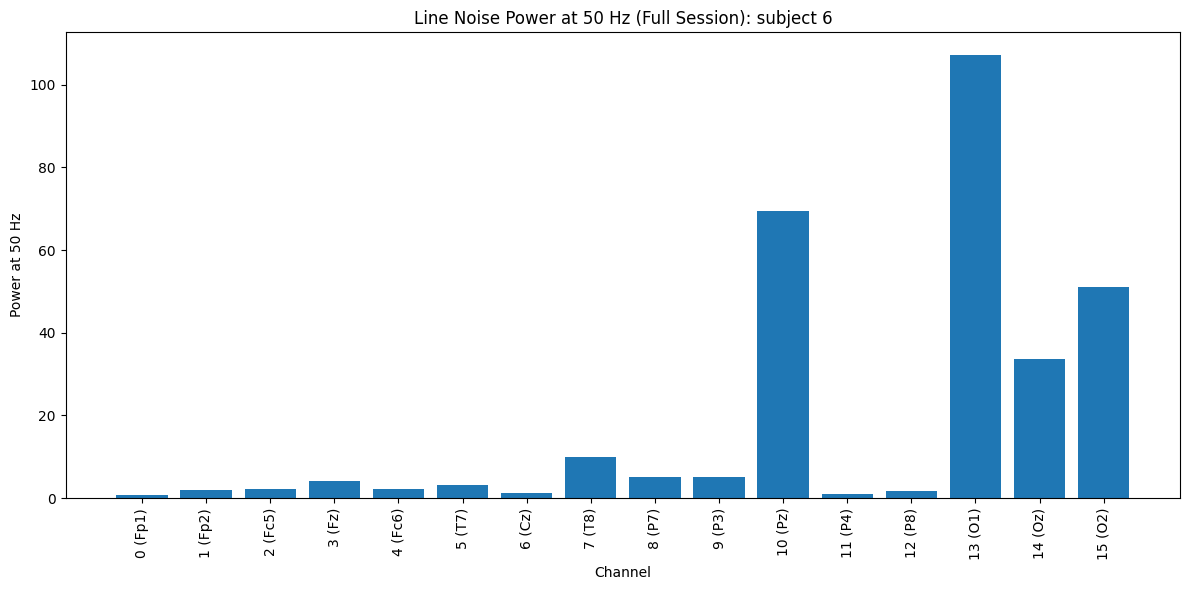

The channel with the most line noise at 50 Hz is O1 (Channel 13).


In [192]:
# Problem 1C #
line_noise_power = []

for ch in range(16):
    ####
    # Calculates the PSD for the full session (not split into eyes-closed and eyes-opened)
    f, Pxx = signal.welch(eeg_data[:, ch], fs, nperseg=256)

    # Find the index of the frequency closest to 50 Hz (line noise frequency)
    freq_idx = np.abs(f - 50).argmin()

    # Append the power at 50 Hz for the current channel to the list
    line_noise_power.append(Pxx[freq_idx])

fig, ax = plt.subplots(figsize=(12, 6))
plot_labels = ['{} ({})'.format(ind, lab) for ind, lab in enumerate(channel_labels)]
ax.bar(plot_labels, line_noise_power)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Line Noise Power at 50 Hz (Full Session): subject 6')
ax.set_xlabel('Channel')
ax.set_ylabel('Power at 50 Hz')

plt.tight_layout()
plt.show()

noisiest_channel = np.argmax(line_noise_power)
print(f"The channel with the most line noise at 50 Hz is {channel_labels[noisiest_channel]} (Channel {noisiest_channel}).")

1C: Channel 13 is the channel with the most noise when the power is at 50 hz.

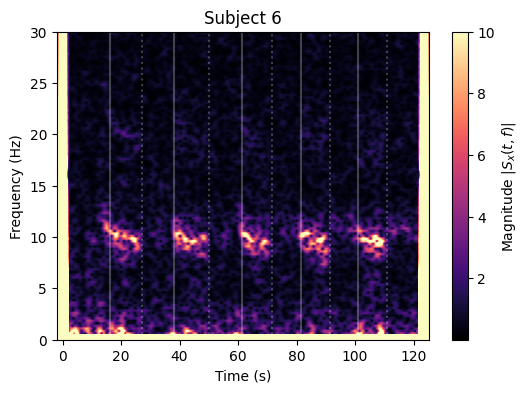

In [193]:
# Problem 2A #
hamm_win = signal.get_window('hamming', Nx=2048);
SFT = signal.ShortTimeFFT(hamm_win, hop=32, fs=fs, scale_to='psd') # 'psd` scaling affects how signal is normalized across frequency
stft = SFT.stft(eeg_data, axis=0)

fig, ax = plt.subplots(1,1,figsize=(6,4))
im = ax.imshow((abs(stft[:,12,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im, label="Magnitude $|S_x(t, f)|$")

ax.set_title('Subject 6')
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Time (s)')
ax.set_ylim(0, 30)
[ax.axvline(t_eeg[idx], color='white', alpha=0.25) for idx in eyes_closed_indices]
[ax.axvline(t_eeg[idx], linestyle=':', color='white', alpha=0.25) for idx in eyes_opened_indices]

2A: The best channel that we found from problem 1B was channel P8 or channel 12. So we can change this line of code, "im = ax.imshow((abs(stft[:,0,:]))" from 0 to 12 to get the data from channel 12, "im = ax.imshow((abs(stft[:,12,:]))". Channel 12(P8) has the greatest ratio for when the eyes are closed and opening at a frequency of 10hz. The bright bands around 10hz indicate when the eyes are in a closed state. The vertical lines correspond to transitions between eyes-open adn eyes-closed states as the alpha activity decreases when the eyes are open and increase when closed.The y-axis represents the frequency in hz.

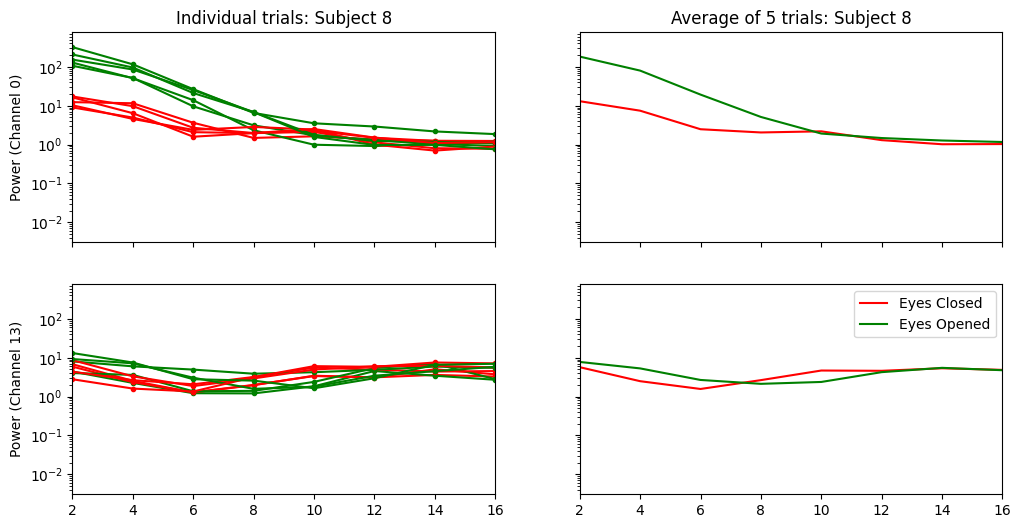

In [194]:
# Problem 2B # Using the other subbjects, subject #8

eeg_data = subject_8_data['eeg_data']
fs = int(subject_8_data['fs']) # Sampling rate of EEG (512 Hz)
eyes_closed_indices = subject_8_data['eyes_closed_indices']
eyes_opened_indices = subject_8_data['eyes_opened_indices']
channel_labels = subject_8_data['channel_labels']

t_eeg = np.arange(eeg_data.shape[0])/fs

######

eyes_closed_signals = []
eyes_opened_signals = []
window_indices = np.arange(4*fs) + 4*fs # Indices will be a vector of 4 s of samples start 4 s after index

for closed in eyes_closed_indices:
    eyes_closed_signals.append(eeg_data[closed + window_indices,:])

for opened in eyes_opened_indices:
    eyes_opened_signals.append(eeg_data[opened + window_indices,:])

######

fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)

nperseg = 256

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].semilogy(f,Pxx, 'r.-')
    eyes_closed_Pxx.append(Pxx)
    f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].semilogy(f,Pxx, 'g.-')
    eyes_opened_Pxx.append(Pxx)

ax[0,1].semilogy(f, np.mean(eyes_closed_Pxx, axis=0), 'r')
ax[0,1].semilogy(f, np.mean(eyes_opened_Pxx, axis=0), 'g')

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 13
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=nperseg)
    eyes_closed_Pxx.append(Pxx)
    ax[1,0].semilogy(f,Pxx, 'r.-')

    f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=nperseg)
    eyes_opened_Pxx.append(Pxx)
    ax[1,0].semilogy(f,Pxx, 'g.-')

ax[1,1].semilogy(f, np.mean(eyes_closed_Pxx, axis=0), 'r', label='Eyes Closed')
ax[1,1].semilogy(f, np.mean(eyes_opened_Pxx, axis=0), 'g', label='Eyes Opened')

ax[0,0].set_title('Individual trials: Subject 8')
ax[0,1].set_title('Average of 5 trials: Subject 8')
ax[0,0].set_ylabel('Power (Channel 0)')
ax[1,0].set_ylabel('Power (Channel 13)')
ax[0,0].set_xlim(2,16)
ax[1,1].legend()

Problem 2B: For subject 8 we can see that the best hz to use would be 10hz. So 10 hz is what we are going to use to find the best channel.

Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).


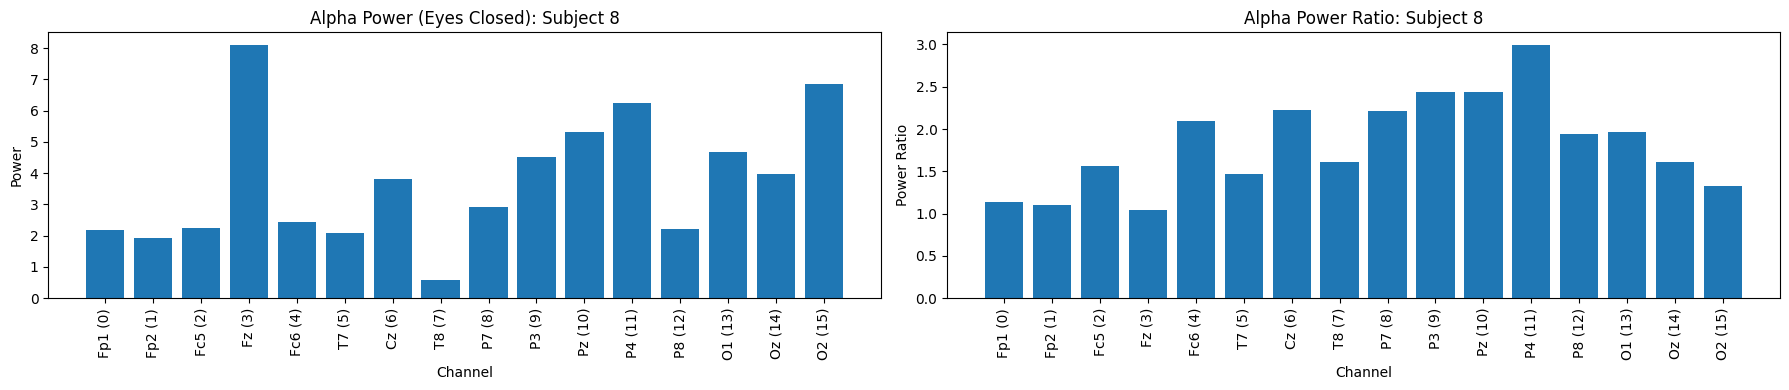

In [195]:
# Problem 2B, subject 8, best channel
alpha_power = []
alpha_power_ratio = []
for ch in range(16):
    ####
    # Fill in function call, ratio calculation and list appends (i.e., alpha_power.append(value1)) here...
     eyes_closed_power, eyes_opened_power = extract_alpha_power(eeg_channel=ch, nperseg=256, frequency = 10)

     alpha_power.append(eyes_closed_power)

     if eyes_opened_power > 0:  # Avoid division by zero
        alpha_power_ratio.append(eyes_closed_power / eyes_opened_power)
     else:
        alpha_power_ratio.append(float('inf'))


# Plotting code
fig, ax = plt.subplots(1,2, figsize=(18,4))
plot_labels = ['{} ({})'.format(ind, lab) for lab, ind in enumerate(channel_labels)]
ax[0].bar(plot_labels, alpha_power)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title('Alpha Power (Eyes Closed): Subject 8')
ax[0].set_xlabel('Channel')
ax[0].set_ylabel('Power')

ax[1].bar(plot_labels, alpha_power_ratio)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('Alpha Power Ratio: Subject 8')
ax[1].set_xlabel('Channel')
ax[1].set_ylabel('Power Ratio')


plt.tight_layout()
plt.show()

Problem 2b: From this bar graph we can see that the best channel for the eyes opening and closing for subject 8 is going to be channel 11 (P4) becasue of the larger power ration in the right graph. Now we can use channel 11 to create a spectrograph for subject 8.

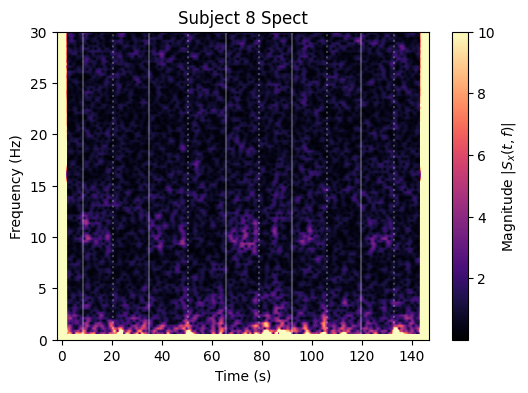

In [196]:
# Problem 2B # Subject 8, spectrograph

hamm_win = signal.get_window('hamming', Nx=2048);
SFT = signal.ShortTimeFFT(hamm_win, hop=32, fs=fs, scale_to='psd') # 'psd` scaling affects how signal is normalized across frequency
stft = SFT.stft(eeg_data, axis=0)

fig, ax = plt.subplots(1,1,figsize=(6,4))
im = ax.imshow((abs(stft[:,11,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im, label="Magnitude $|S_x(t, f)|$")

ax.set_title('Subject 8 Spect')
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Time (s)')
ax.set_ylim(0, 30)
[ax.axvline(t_eeg[idx], color='white', alpha=0.25) for idx in eyes_closed_indices]
[ax.axvline(t_eeg[idx], linestyle=':', color='white', alpha=0.25) for idx in eyes_opened_indices]

Problem 2B: Once again we are changing this line of code "im = ax.imshow((abs(stft[:,11,:]))" to select the channel that we found to be the best, in this case it is 11. Again we can see the the high alpha activity at 10 hz when the mouse is opening and closing its eyes. The data is a little ahrder to see compared that of subject 6. The fading of the alpha frequency can indicate that the alpha frequency is less prominent at 10hz or does not contantly appear when the eyes are closed.

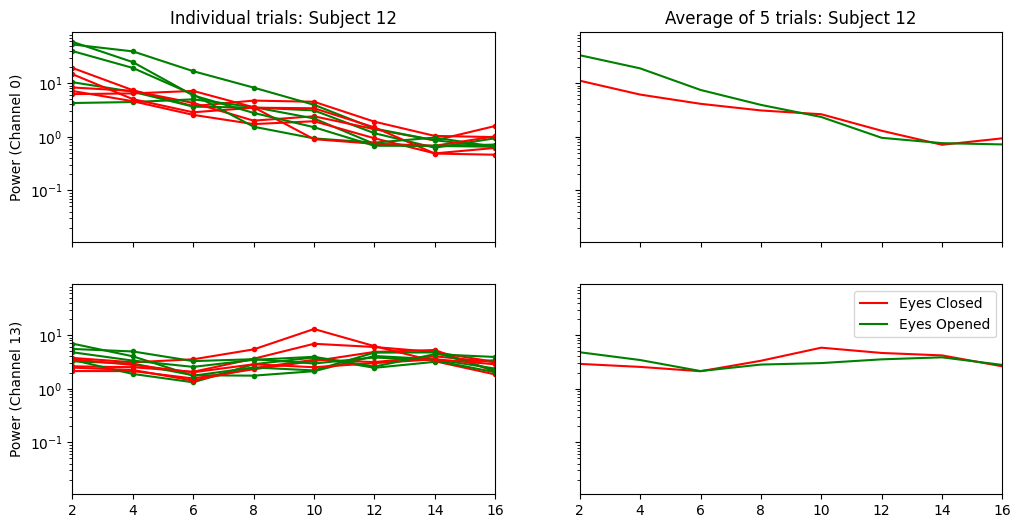

In [197]:
# Problem 2B #  subject #12

eeg_data = subject_12_data['eeg_data']
fs = int(subject_12_data['fs']) # Sampling rate of EEG (512 Hz)
eyes_closed_indices = subject_12_data['eyes_closed_indices']
eyes_opened_indices = subject_12_data['eyes_opened_indices']
channel_labels = subject_12_data['channel_labels']

t_eeg = np.arange(eeg_data.shape[0])/fs

######

eyes_closed_signals = []
eyes_opened_signals = []
window_indices = np.arange(4*fs) + 4*fs # Indices will be a vector of 4 s of samples start 4 s after index

for closed in eyes_closed_indices:
    eyes_closed_signals.append(eeg_data[closed + window_indices,:])

for opened in eyes_opened_indices:
    eyes_opened_signals.append(eeg_data[opened + window_indices,:])

######

fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)

nperseg = 256

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].semilogy(f,Pxx, 'r.-')
    eyes_closed_Pxx.append(Pxx)
    f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].semilogy(f,Pxx, 'g.-')
    eyes_opened_Pxx.append(Pxx)

ax[0,1].semilogy(f, np.mean(eyes_closed_Pxx, axis=0), 'r')
ax[0,1].semilogy(f, np.mean(eyes_opened_Pxx, axis=0), 'g')

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 13
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=nperseg)
    eyes_closed_Pxx.append(Pxx)
    ax[1,0].semilogy(f,Pxx, 'r.-')

    f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=nperseg)
    eyes_opened_Pxx.append(Pxx)
    ax[1,0].semilogy(f,Pxx, 'g.-')

ax[1,1].semilogy(f, np.mean(eyes_closed_Pxx, axis=0), 'r', label='Eyes Closed')
ax[1,1].semilogy(f, np.mean(eyes_opened_Pxx, axis=0), 'g', label='Eyes Opened')

ax[0,0].set_title('Individual trials: Subject 12')
ax[0,1].set_title('Average of 5 trials: Subject 12')
ax[0,0].set_ylabel('Power (Channel 0)')
ax[1,0].set_ylabel('Power (Channel 13)')
ax[0,0].set_xlim(2,16)
ax[1,1].legend()

Problem 2B: For subject 12 we can see that the best frequecy to use again for their alpha is 10 hz.

Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).
Using frequency 10.0 (10 specified).


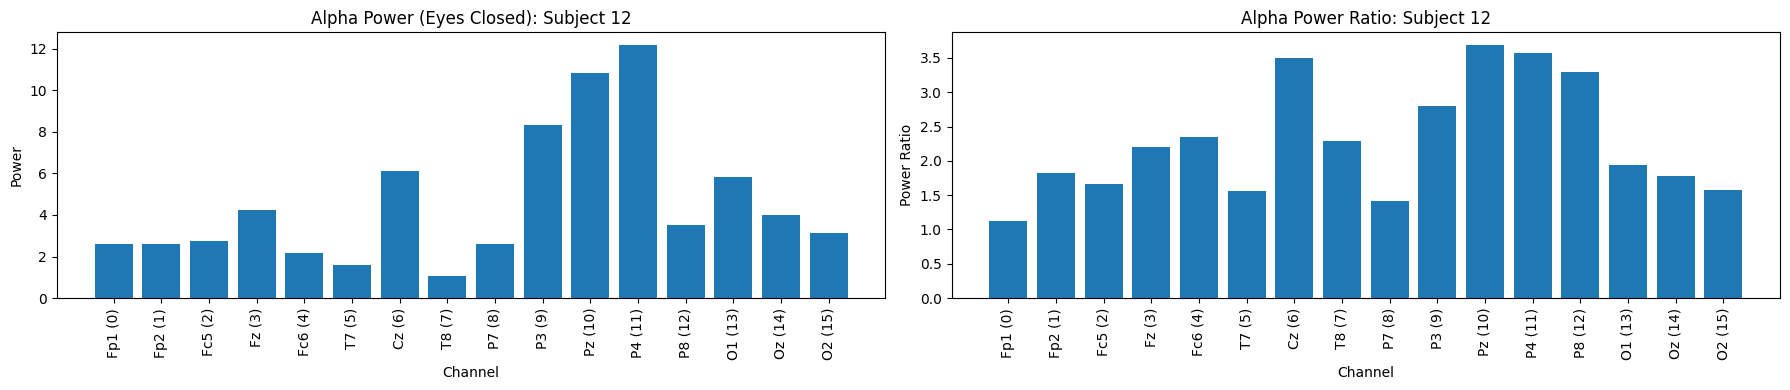

In [198]:
# Problem 2B # Subject 12, Best Channel

alpha_power = []
alpha_power_ratio = []
for ch in range(16):
    ####
    # Fill in function call, ratio calculation and list appends (i.e., alpha_power.append(value1)) here...
     eyes_closed_power, eyes_opened_power = extract_alpha_power(eeg_channel=ch, nperseg=256, frequency = 10)

     alpha_power.append(eyes_closed_power)

     if eyes_opened_power > 0:  # Avoid division by zero
        alpha_power_ratio.append(eyes_closed_power / eyes_opened_power)
     else:
        alpha_power_ratio.append(float('inf'))


# Plotting code
fig, ax = plt.subplots(1,2, figsize=(18,4))
plot_labels = ['{} ({})'.format(ind, lab) for lab, ind in enumerate(channel_labels)]
ax[0].bar(plot_labels, alpha_power)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title('Alpha Power (Eyes Closed): Subject 12')
ax[0].set_xlabel('Channel')
ax[0].set_ylabel('Power')

ax[1].bar(plot_labels, alpha_power_ratio)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('Alpha Power Ratio: Subject 12')
ax[1].set_xlabel('Channel')
ax[1].set_ylabel('Power Ratio')

plt.tight_layout()
plt.show()

Problem 2B: We can use the alpha frequecy we found above which is 10 hz to look at each channel for the alpha power when eyes closed and the power ratio. From this we can determine for our spectrogram that the best channel to use for eyes opening and closing is channel 10 (P2) with the highest power ratio.

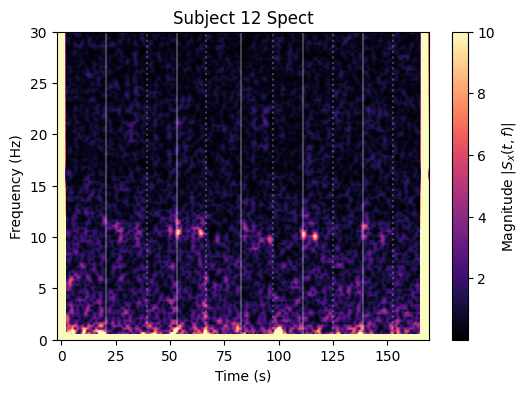

In [199]:
# Problem 2B, subject 12, spectrograph

hamm_win = signal.get_window('hamming', Nx=2048);
SFT = signal.ShortTimeFFT(hamm_win, hop=32, fs=fs, scale_to='psd') # 'psd` scaling affects how signal is normalized across frequency
stft = SFT.stft(eeg_data, axis=0)

fig, ax = plt.subplots(1,1,figsize=(6,4))
im = ax.imshow((abs(stft[:,10,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im, label="Magnitude $|S_x(t, f)|$")

ax.set_title('Subject 12 Spect')
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Time (s)')
ax.set_ylim(0, 30)
[ax.axvline(t_eeg[idx], color='white', alpha=0.25) for idx in eyes_closed_indices]
[ax.axvline(t_eeg[idx], linestyle=':', color='white', alpha=0.25) for idx in eyes_opened_indices]

Problem 2B: Again we change this line of code "im = ax.imshow((abs(stft[:,10,:]))" to channel 10 since it is the best channel we found for subject 12. Now we have a spectrograph looking at channel 10 for subject 12. For subject 12 we can see a prominent orange band that shows the alpha activity is present at 10 hz. This graph also shows the eyes open and closed activity over time like the others. For this spectrograph there is lower activity around 5 hz which is associated with theta or delta waves but less prominant than the 10 hz.   

Problem 2B: For the other subjects 8 and 12 we do not see a sweep in their alpha histogram that was present for subject 6 when looking at their best alpha frequency and finding the best channel for opening and closing their eyes using that frequency. Subject 6 had a very prominent band where subjects 8 and subject 12 bands in their spectrographs are way less prominent or spread out. To me I do not see any clear upward or downward sweep like you can with subject 6.

Text(0, 0.5, 'Response of filter (dB)')

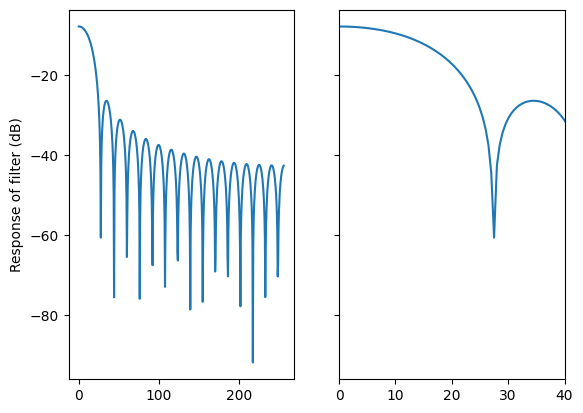

In [200]:
# Problem 3 #
eeg_data = subject_6_data['eeg_data']
fs = int(subject_6_data['fs']) # Sampling rate of EEG (512 Hz)
eyes_closed_indices = subject_6_data['eyes_closed_indices']
eyes_opened_indices = subject_6_data['eyes_opened_indices']
channel_labels = subject_6_data['channel_labels']

t_eeg = np.arange(eeg_data.shape[0])/fs

#####

b = signal.firls(numtaps=33, bands=[0, 5, 7, 12, 14, 256], desired=[0, 0, 1, 1, 0, 0], fs=fs)
f, response = signal.freqz(b, fs=fs) # Filter response is a complex number. We can ignore the phase for now.

fig, ax = plt.subplots(1,2, sharey=True)
ax[0].plot(f, 20*np.log10(np.abs(response))) # 20*log10() creates a response in "dB"
ax[1].plot(f, 20*np.log10(np.abs(response)))
ax[1].set_xlim(0,40)
ax[0].set_ylabel('Response of filter (dB)')



Text(0, 0.5, 'Response of filter (dB)')

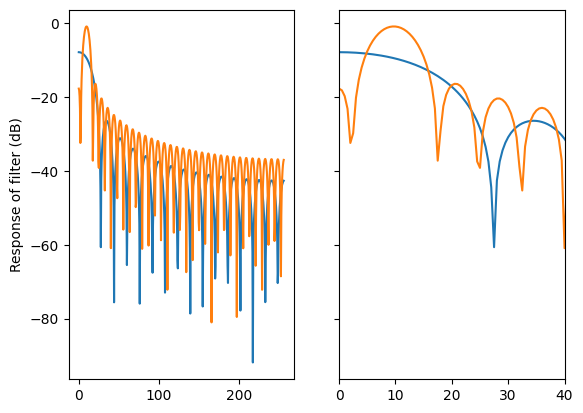

In [201]:
#####
b2 = signal.firls(numtaps=65, bands=[0, 5, 7, 12, 14, 256], desired=[0, 0, 1, 1, 0, 0], fs=fs)
f, response2 = signal.freqz(b2, fs=fs) # Filter response is a complex number. We can ignore the phase for now.

fig, ax = plt.subplots(1,2, sharey=True)
ax[0].plot(f, 20*np.log10(np.abs(response))) # 20*log10() creates a response in "dB"
ax[0].plot(f, 20*np.log10(np.abs(response2))) # 20*log10() creates a response in "dB"
ax[1].plot(f, 20*np.log10(np.abs(response)))
ax[1].plot(f, 20*np.log10(np.abs(response2)))
ax[1].set_xlim(0,40)
ax[0].set_ylabel('Response of filter (dB)')

Text(0, 0.5, 'Channel 13 Signal')

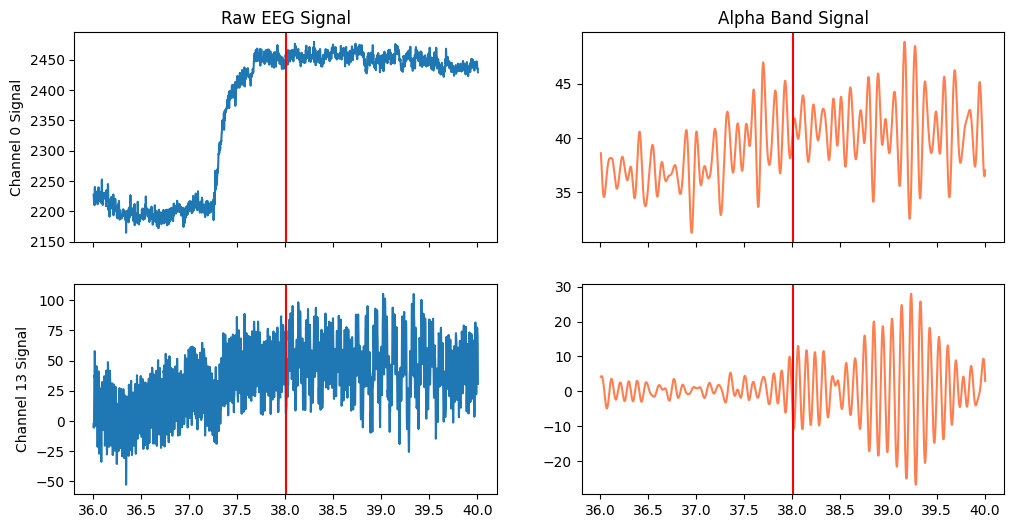

In [202]:
alpha_data = signal.filtfilt(b2, 1, eeg_data, axis=0)

closed_index = eyes_closed_indices[1,0] # Index of second eyes closing index

fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True)

ax[0,0].plot(t[closed_index - 1024: closed_index + 1024], eeg_data[closed_index - 1024: closed_index + 1024, 0])
ax[1,0].plot(t[closed_index - 1024: closed_index + 1024], eeg_data[closed_index - 1024: closed_index + 1024, 13])

ax[0,1].plot(t[closed_index - 1024: closed_index + 1024], alpha_data[closed_index - 1024: closed_index + 1024, 0], color='coral')
ax[1,1].plot(t[closed_index - 1024: closed_index + 1024], alpha_data[closed_index - 1024: closed_index + 1024, 13], color='coral')

[a.axvline(t[closed_index], color='r') for a in ax.flatten()]

ax[0,0].set_title('Raw EEG Signal')
ax[0,1].set_title('Alpha Band Signal')
ax[0,0].set_ylabel('Channel 0 Signal')
ax[1,0].set_ylabel('Channel 13 Signal')

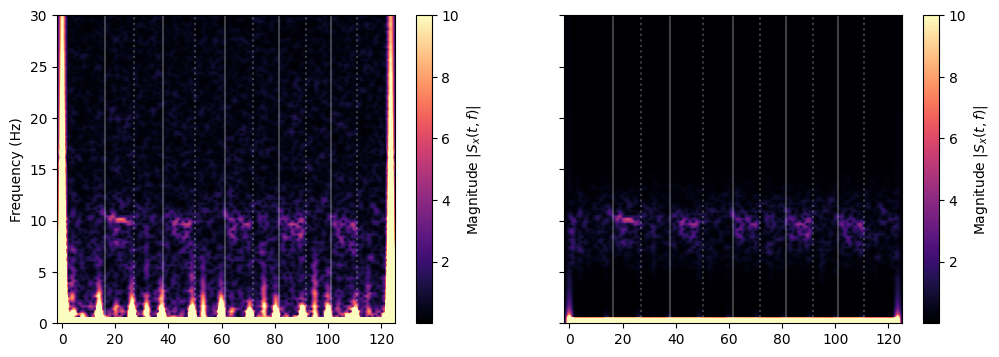

In [203]:
hamm_win = signal.get_window('hamming', Nx=2048);
SFT = signal.ShortTimeFFT(hamm_win, hop=32, fs=fs, scale_to='psd') # 'psd` scaling affects how signal is normalized across frequency
stft = SFT.stft(eeg_data, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,4), sharey=True, sharex=True)
im = axs[0].imshow((abs(stft[:,0,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im, label="Magnitude $|S_x(t, f)|$")
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_ylim(0, 30)

stft2 = SFT.stft(alpha_data, axis=0)
im2 = axs[1].imshow((abs(stft2[:,0,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im2, label="Magnitude $|S_x(t, f)|$")


for ax in axs:
    [ax.axvline(t_eeg[idx], color='white', alpha=0.25) for idx in eyes_closed_indices]
    [ax.axvline(t_eeg[idx], linestyle=':', color='white', alpha=0.25) for idx in eyes_opened_indices]

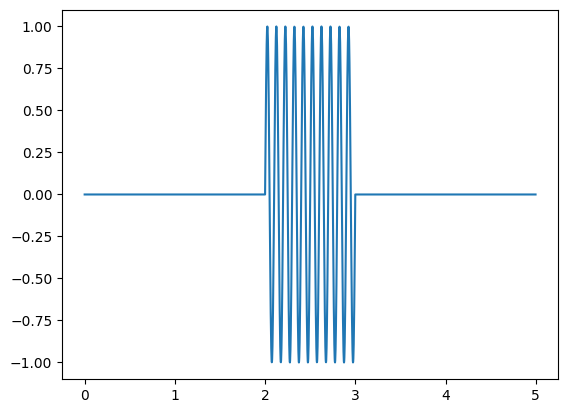

In [204]:
fake_t = np.arange(5*fs)/fs
fake_alpha = np.zeros(fake_t.shape[0])
fake_alpha[2*fs:3*fs] = np.sin(2*np.pi*10*fake_t[2*fs:3*fs])
plt.plot(fake_t, fake_alpha)

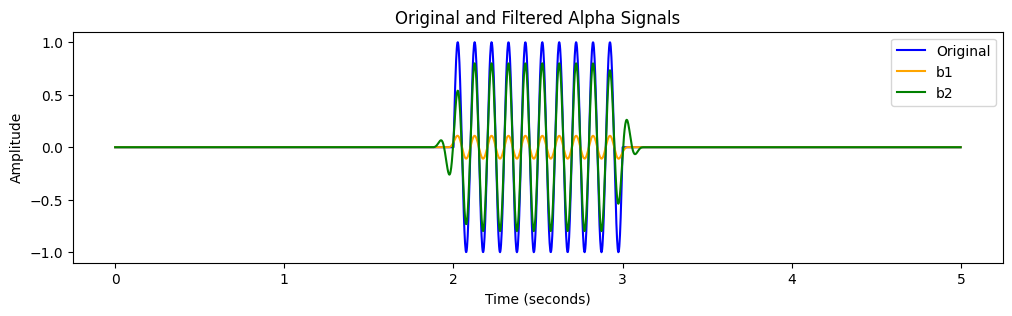

In [205]:
# Problem 3A #
fake_t = np.arange(5*fs)/fs
fake_alpha = np.zeros(fake_t.shape[0])
fake_alpha[2*fs:3*fs] = np.sin(2*np.pi*10*fake_t[2*fs:3*fs])

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(fake_t, fake_alpha, label='Original', color='blue')

b1 = signal.firls(numtaps=33, bands=[0, 5, 7, 12, 14, 256], desired=[0, 0, 1, 1, 0, 0], fs=fs)
b2 = signal.firls(numtaps=65, bands=[0, 5, 7, 12, 14, 256], desired=[0, 0, 1, 1, 0, 0], fs=fs)

filtered_alpha_b1 = signal.filtfilt(b1, 1, fake_alpha)  # Filter with numtaps=33
filtered_alpha_b2 = signal.filtfilt(b2, 1, fake_alpha)  # Filter with numtaps=65

ax.plot(fake_t, filtered_alpha_b1, label='b1', color='orange')
ax.plot(fake_t, filtered_alpha_b2, label='b2', color='green')

ax.set_title('Original and Filtered Alpha Signals')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude')
ax.legend()

Problem 3A: B1 the orange wave at numtaps 33 causes a slight extension of the signal beyond the 2-3 second window and it extends approximately 1/2 cycle beyond the original boundaries on both sides. B2 the green with numtaps = 65 results in a more singificant smearing around the edges because this filter starts further before 2 seconds and end after 3 seconds compared to b1. The smearing extends about 1 full cycle meaning 2 full cycles of smearing since it extends on both sides.
For b1 there is some distortion and the shape of the sine wave is not perfectly smooth compared to the original signal. The amplitude is less and the wave appears less sharp. For b2 the filter provides a much smoother signal that closely follows the original time bounds, but due to the longer filter length the signal extends beyond the original time bounds. The amplitude of b2 is closer to the original and has minimal distortion.
The longer filter b2 does a better job than b1 at keeping the shape of the alpha signal but at the cost of extending the signal beyond its original bounds.

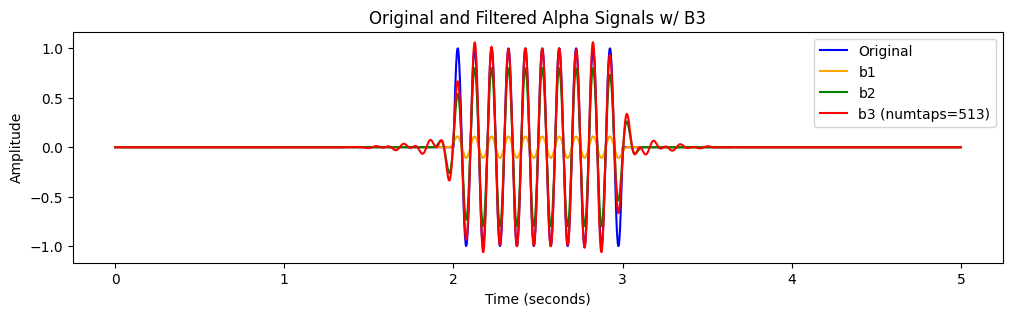

In [206]:
# Problem 3B #

#new filter
b3 = signal.firls(numtaps=513, bands=[0, 5, 7, 12, 14, 256], desired=[0, 0, 1, 1, 0, 0], fs=fs)

#new filter
filtered_alpha_b3 = signal.filtfilt(b3, 1, fake_alpha)

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(fake_t, fake_alpha, label='Original', color='blue')
ax.plot(fake_t, filtered_alpha_b1, label='b1', color='orange')
ax.plot(fake_t, filtered_alpha_b2, label='b2', color='green')
ax.plot(fake_t, filtered_alpha_b3, label='b3 (numtaps=513)', color='red')

ax.set_title('Original and Filtered Alpha Signals w/ B3')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude')
ax.legend()


Problem 3B: The new filter b3 extends significantly beyond the original filter bounds. The b3 filter starts halfway after one second and then halfway after 3 seconds. This means that the signal extends about 10 extra cycles compared to the original 2-3 second window. B3 seems to show little distortion from the original signal int he time frame of 2-3 seconds. Within this time window the b3 filter seems to be consistent with the original. There is significant smearing occuring outside of the original time window but the sine wave shape is preserved inside the original window. Meaning that the distortion occures outside of the original window of 2-3 seconds and is most noticeable before 2 seconds and after 3 seconds, at the beginning and end.

In [210]:
!apt-get install -y pandoc

!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic

%cd /content/drive/MyDrive/Colab # change the path to the location of your ipynb



!jupyter nbconvert --to pdf HW3.ipynb # change the file name to your ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab # change the path to the location of your ipynb'
/content
[NbConvertApp] WARNING | pattern 'HW3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-li